In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
sns.set(rc={'figure.figsize':(15,8)})
import math

In [59]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *
import multimodel_venn

In [61]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH',]#'MIN', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [62]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [63]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [64]:
gorder1 = ['Strong', 'Sustained', 'Weak','Inhibited',  ]
gpalette1 = gpalette[:2] + [gpalette[3], gpalette[2], ]
sns.color_palette(gpalette1)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [65]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [66]:
ccnorder = ['Bp', 'Np','Bh',  'Nh', 'DIN','DON',  'RDON', ]
ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DINCOLOR, DONCOLOR, RDONCOLOR, ]

#Hex Codes: #262842, #293961, #2C497F, #8897BD, #E3E4FA
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
#Hex Codes: #5E1525, #C74F29, #E99E46, #B6C38D, #828144
ccnpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#262842', '#2C497F', '#8897BD']
#ccnpalette = ['#828144', '#B6C38D', '#E99E46', '#E7BB96', '#262842', '#2C497F', '#8897BD']
cccorder = ['Bp[C]', 'Cp','Bh[C]',  'Ch', 'DIC','DOC',  'RDOC', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DICCOLOR, DOCCOLOR, RDOCCOLOR, ]
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
cccpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#DF5F35', '#EF9E84', '#ffd8d1']

sns.color_palette(cccpalette)

[(0.1843137254901961, 0.403921568627451, 0.3333333333333333),
 (0.596078431372549, 0.6509803921568628, 0.6039215686274509),
 (0.49019607843137253, 0.3607843137254902, 0.32941176470588235),
 (0.9058823529411765, 0.7333333333333333, 0.5882352941176471),
 (0.8745098039215686, 0.37254901960784315, 0.20784313725490197),
 (0.9372549019607843, 0.6196078431372549, 0.5176470588235295),
 (1.0, 0.8470588235294118, 0.8196078431372549)]

In [67]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [68]:
dpath = '../results/final/het/biogeo'


In [69]:
comb_df = pd.concat([pd.read_csv(os.path.join(dpath, fname)) for fname in os.listdir(dpath)], ignore_index=True)


In [70]:
comb_df = comb_df.copy()


In [71]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Bp Final', 'Np Final',
       ...
       'additionalLossRateh Integrated', 'deathC_DOCp Integrated',
       'deathC_DOCh Integrated', 'deathN_DONp Integrated',
       'deathN_DONh Integrated', 'PP', 'Total N uptake', 'PP / total fixed C',
       'N reuse', 'Unnamed: 0'],
      dtype='object', length=126)

In [72]:
def _change_col(c):
    suffixes = ('Integrated','Final')
    for suffix in suffixes:
        s = f' {suffix}'
        if c.endswith(s):
            c = c.replace(s, '')
            c= f'{suffix} {c}'
            return c
    return c
comb_df.rename(columns={c:_change_col(c) for c in comb_df.columns}, inplace=True)


In [73]:
list(comb_df.columns)

['model',
 'Phase',
 'VPRO',
 'Versatile',
 'run_id',
 'y_pred',
 'Sample',
 'max_prob',
 'Final Bp',
 'Final Np',
 'Final Cp',
 'Final Bh',
 'Final Nh',
 'Final Ch',
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 't',
 'day',
 'Final gross_uptakeINp',
 'Final gross_uptakeINh',
 'Final gross_uptakeONp',
 'Final gross_uptakeONh',
 'Final gross_uptakeICp',
 'Final gross_uptakeICh',
 'Final gross_uptakeOCp',
 'Final gross_uptakeOCh',
 'uptakeNp',
 'uptakeNh',
 'uptakeCp',
 'uptakeCh',
 'QCp',
 'QCh',
 'biosynthesisNp',
 'biosynthesisNh',
 'Final respirationCp',
 'Final respirationCh',
 'biomass_breakdownCp',
 'biomass_breakdownCh',
 'Final overflowNp',
 'Final overflowNh',
 'Final overflowCp',
 'Final overflowCh',
 'Final ROSproductionp',
 'Final ROSproductionh',
 'Final ROSlossp',
 'Final ROSlossh',
 'deathbiomassNp',
 'deathbiomassNh',
 'deathstoreNp',
 'deathstoreNh',
 'deathstoreCp',
 'deathstoreCh',
 'DON2DIN_exop',
 'Final DON2DI

In [74]:
comb_df['Final Organic C'] = comb_df[['Final DOC', 'Final RDOC', 'Final Bptotal[C]', 'Final Bhtotal[C]', ]].sum(axis=1)
comb_df['Integrated N uptake'] = comb_df[['Integrated gross_uptakeINp', 'Integrated gross_uptakeONp', 
                                          'Integrated gross_uptakeINh', 'Integrated gross_uptakeONh',  ]].sum(axis=1)

comb_df['Integrated C Biomassp'] = comb_df['Integrated Bptotal[C]']
comb_df['Integrated C Biomassh'] = comb_df['Integrated Bhtotal[C]']
comb_df['Integrated N Biomassp'] = comb_df['Integrated Bptotal[N]']
comb_df['Integrated N Biomassh'] = comb_df['Integrated Bhtotal[N]']



In [75]:
value_cols = [
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',

 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',

 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'
]



In [76]:

for i in [
    'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
  'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'   
]:
    comb_df[i] = comb_df[i].div(comb_df.t) 

In [77]:
comb_df.rename(columns={c: c.replace('gross_uptake', 'Uptake ') for c in comb_df.columns}, inplace=True)

In [78]:
comb_df = comb_df.copy()

In [79]:
mmap = {
    'EXOENZYME' : 'E', 
    'EXOENZYME-MIXOTROPH' : 'EM' , 
    'EXOENZYME-ROS' : 'ER',
       'EXOENZYME-ROS-MIXOTROPH' : 'ERM', 
    'MIN' : '-', 
    'MIXOTROPH' : 'M',
    'OVERFLOW' : 'O',
       'OVERFLOW-EXOENZYME' : 'EO',
    'OVERFLOW-EXOENZYME-MIXOTROPH' : 'EOM',
       'OVERFLOW-MIXOTROPH' : 'OM',
    'OVERFLOW-ROS' : 'OR', 
    'OVERFLOW-ROS-EXOENZYME' : 'EOR',
       'OVERFLOW-ROS-MIXOTROPH' : 'ORM', 
    'ROS' : 'R', 
    'ROS-MIXOTROPH' : 'RM',
       'ROS-MIXOTROPH-OVERFLOW-EXOENZYME' : 'EORM',
}

In [80]:
comb_df['MODEL'] = comb_df['model'].map(mmap)
for m in morder:
    comb_df[m] = comb_df.model.str.contains(m)

In [81]:
comb_df['Integrated C Biomass']  = comb_df['Integrated C Biomassp'] +comb_df['Integrated C Biomassh']
comb_df['Integrated N Biomass']  = comb_df['Integrated N Biomassp'] +comb_df['Integrated N Biomassh']
comb_df['Carbon Use Efficiency'] = comb_df['Final Organic C'].div(comb_df['Integrated Uptake ICp'] )
comb_df['Final RDOC / Organic C'] = comb_df['Final RDOC'].div(comb_df['Final Organic C'])
comb_df['Final RDON / Total N'] = comb_df['Final RDON'].div(INIT_BH+INIT_BP+INIT_DIN+ INIT_DON)

In [97]:
sns.set_context('poster', font_scale=1.5)
sns.set(rc={'figure.figsize':(15,8)})

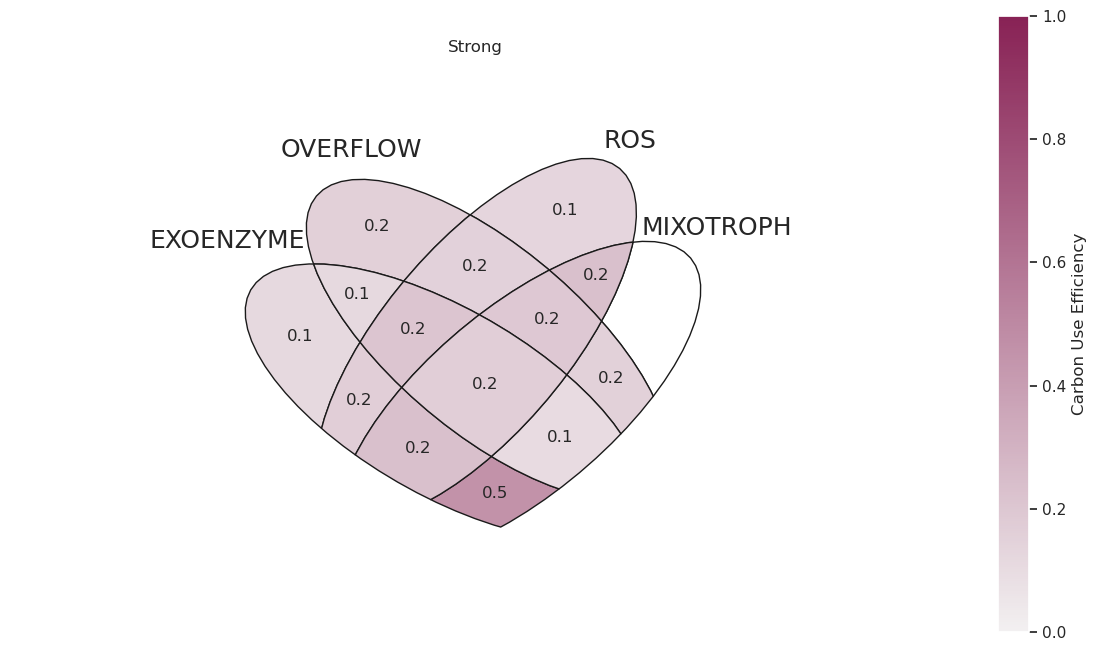

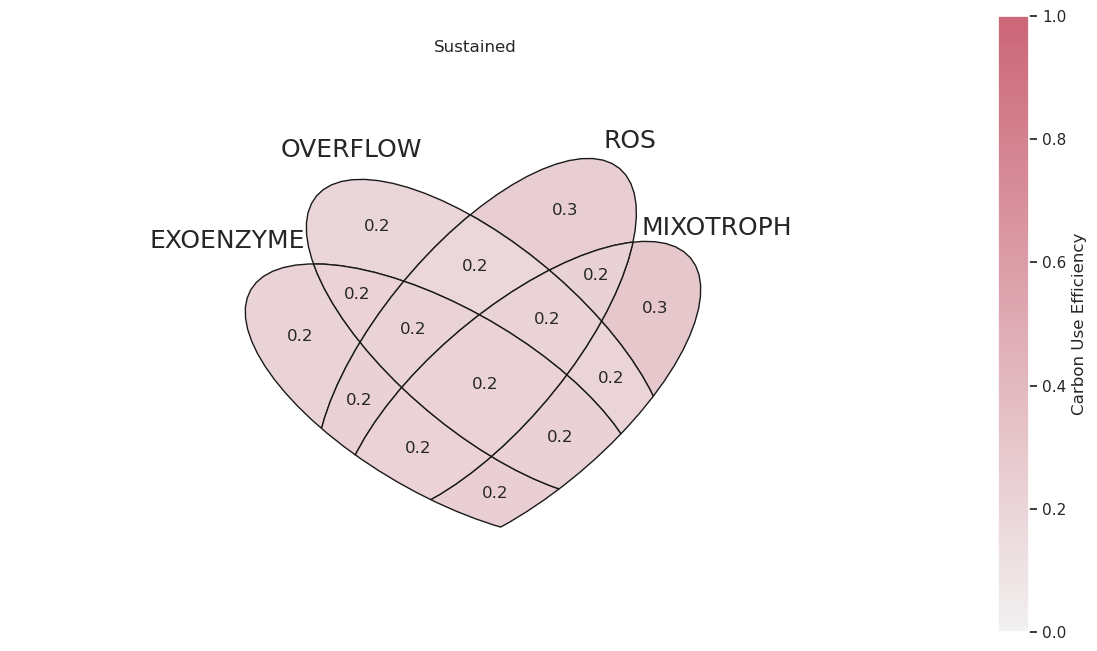

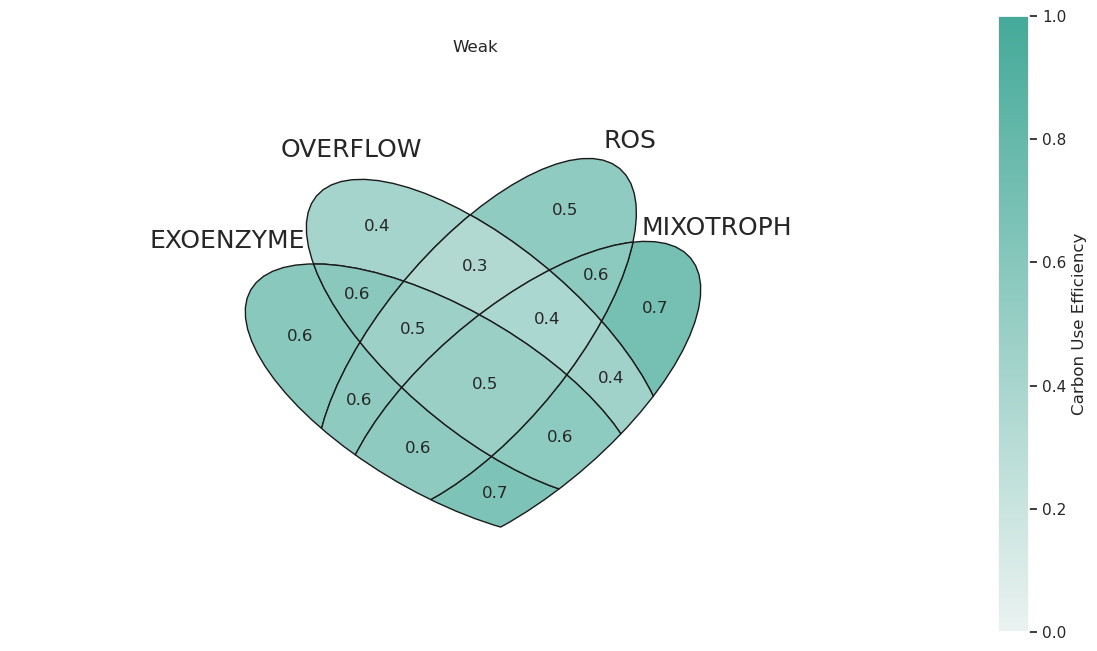

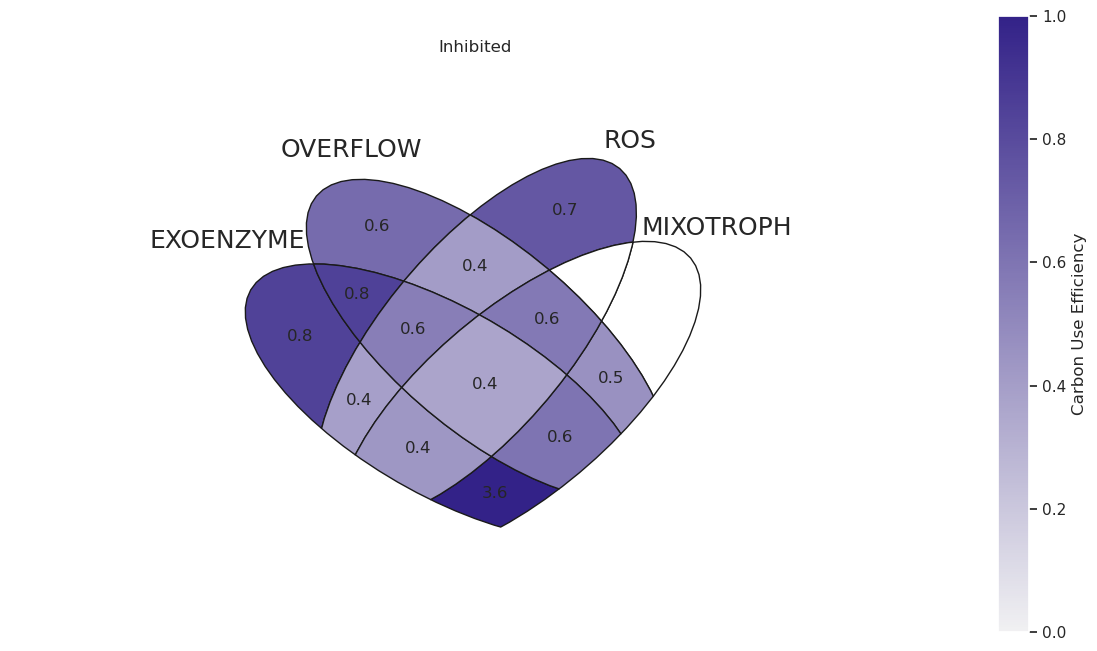

In [113]:
for col in ['Carbon Use Efficiency', ]:
    for i,c  in zip(gorder1, gpalette1):
        data_dict = comb_df.loc[comb_df.Versatile & comb_df.y_pred.isin([i])].groupby(morder)[col].median() 
        multimodel_venn.multimodel_venn(
            morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True), 
            data_dict=data_dict, vmin=0, vmax=1, 
            cbar_label=col,
            annfmt='.1f'
        )
        plt.title(i)
        plt.show()

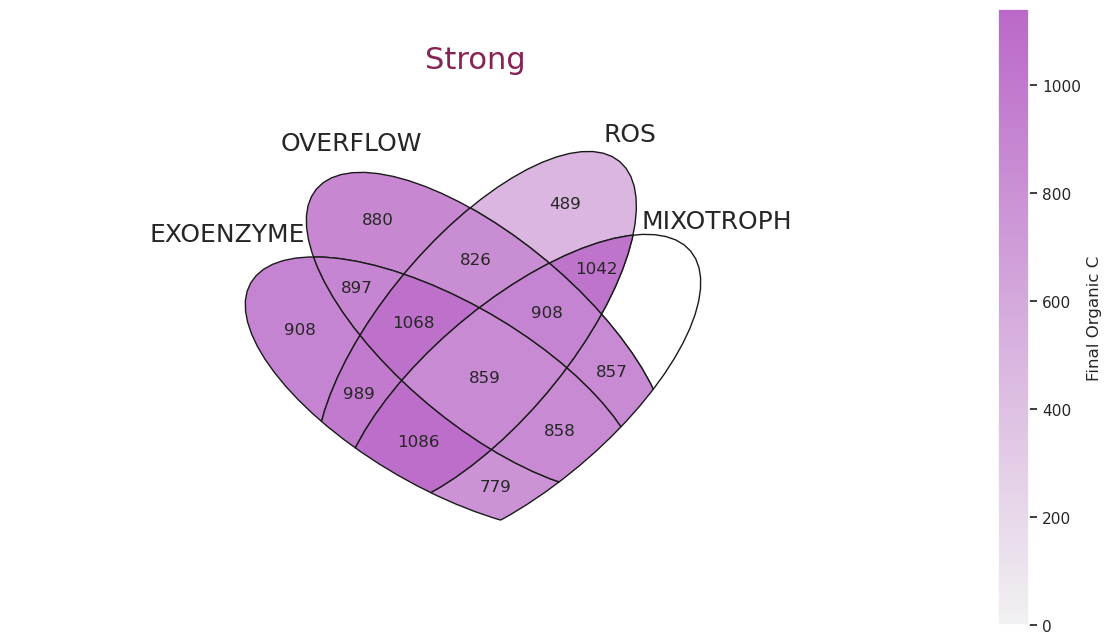

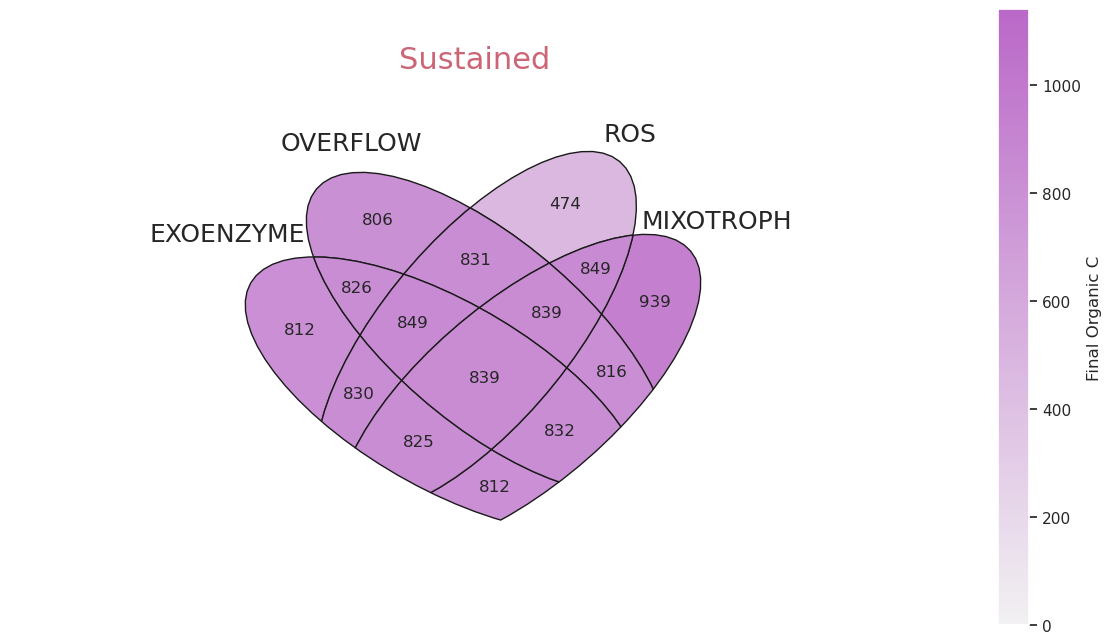

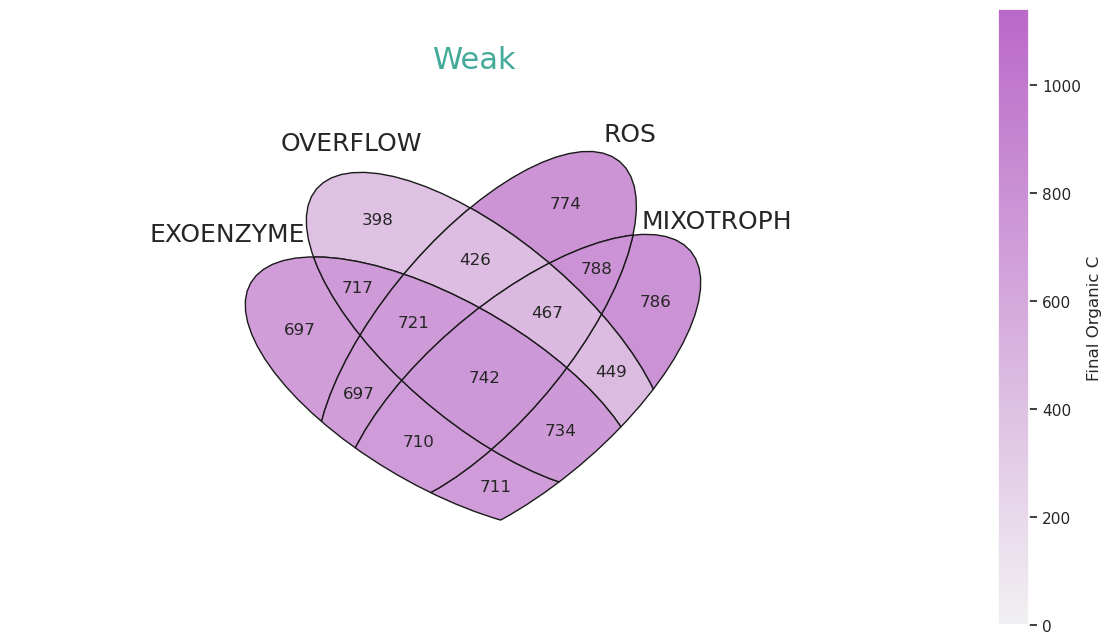

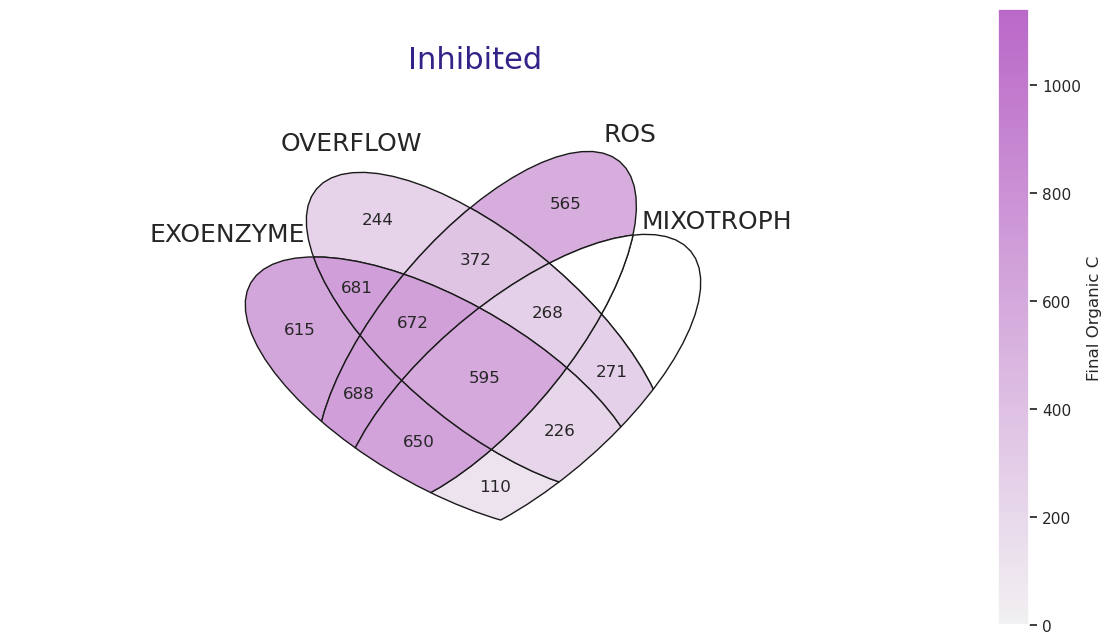

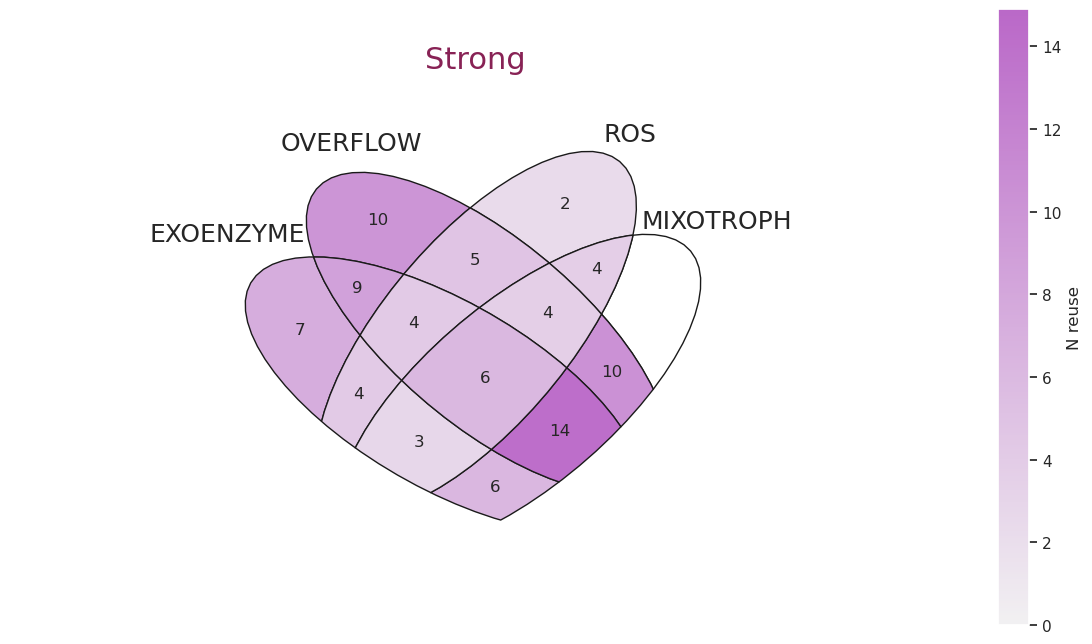

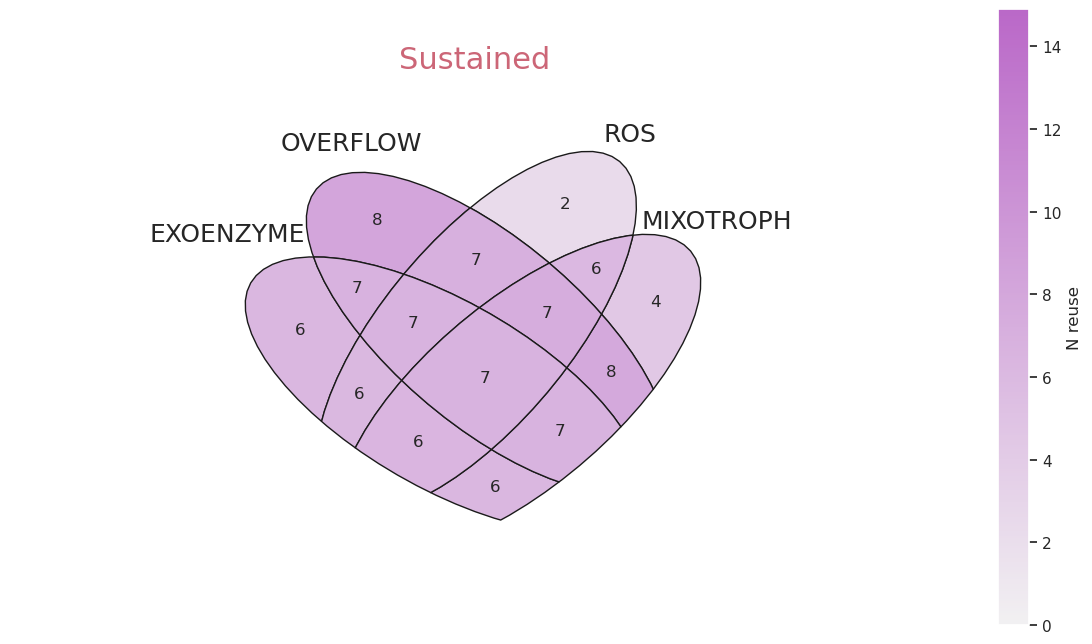

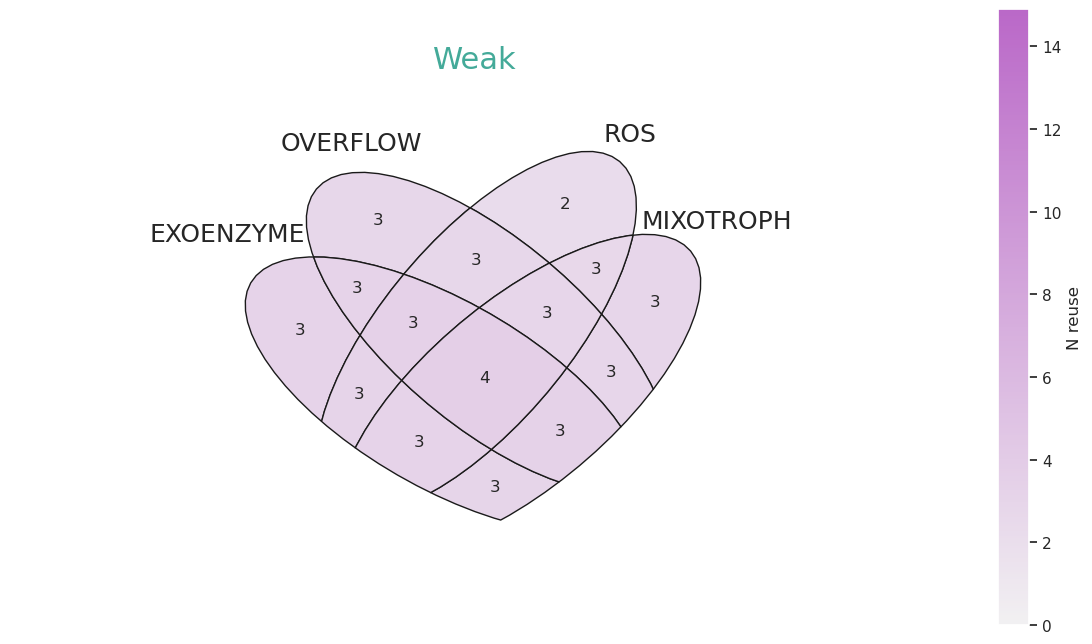

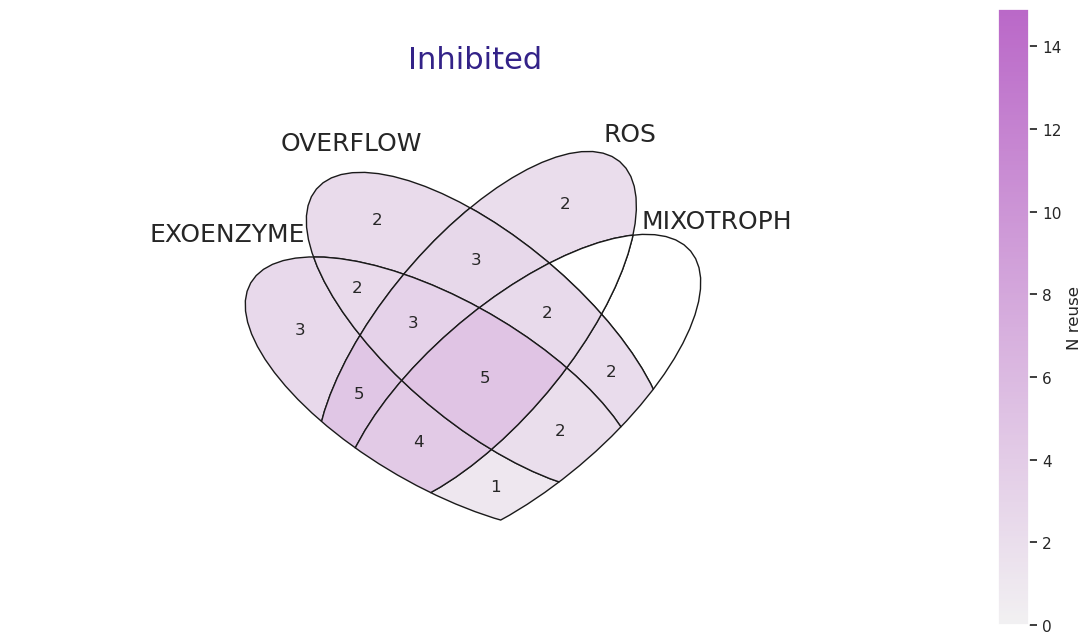

In [112]:
for col in ['Final Organic C', 'N reuse', ]:
    vmax = comb_df.loc[comb_df.Versatile & comb_df.y_pred.isin(gorder1)].groupby(['y_pred', 'MODEL'])[col].median().max()*1.05 
    for i,c  in zip(gorder1, gpalette1):
        
        data_dict = comb_df.loc[comb_df.Versatile & comb_df.y_pred.isin([i])].groupby(morder)[col].median() 
        multimodel_venn.multimodel_venn(
            morder, cmap=sns.light_palette('#ba68c8', n_colors=16, as_cmap=True), 
            data_dict=data_dict, vmin=0, vmax=vmax, #ec=c,
            cbar_label=col,
            annfmt='.0f'
        )
        plt.title(i, fontsize=22, color=c, va='top')
        plt.show()

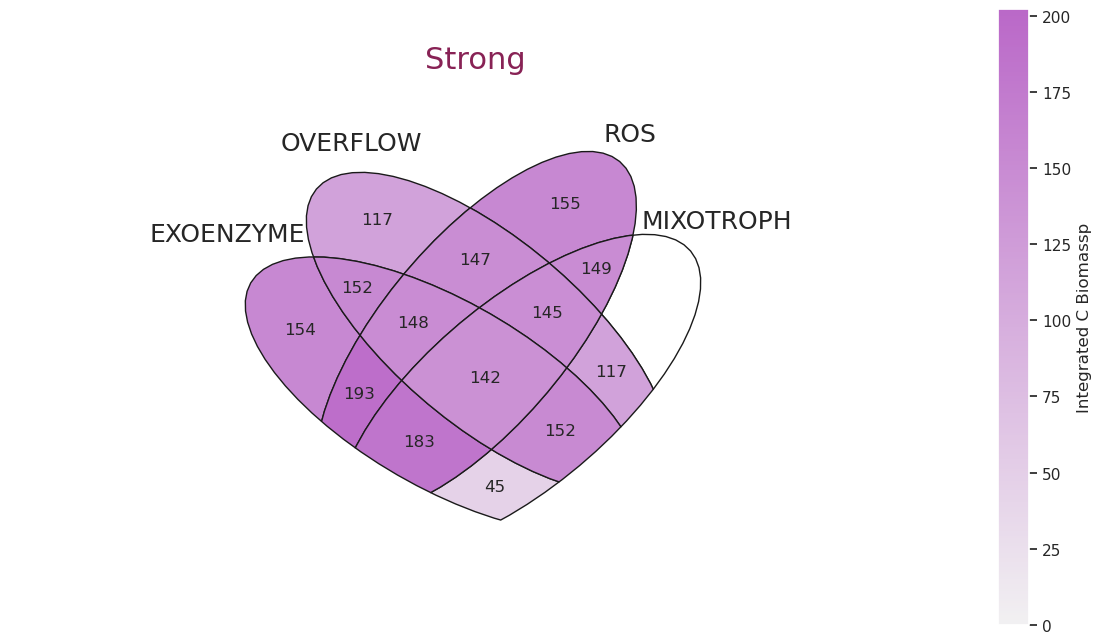

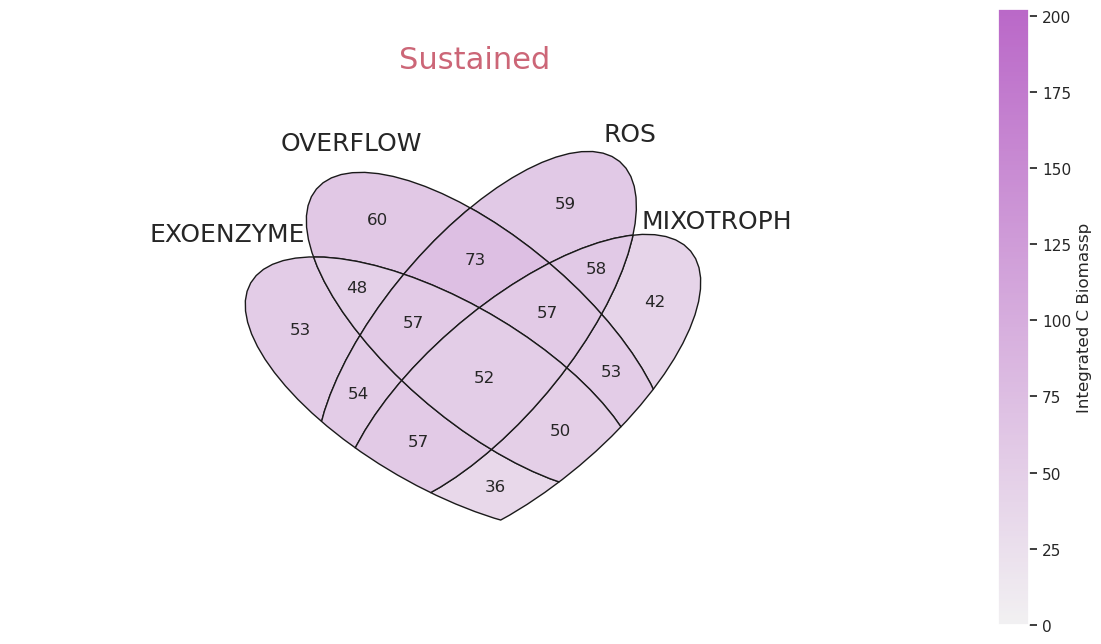

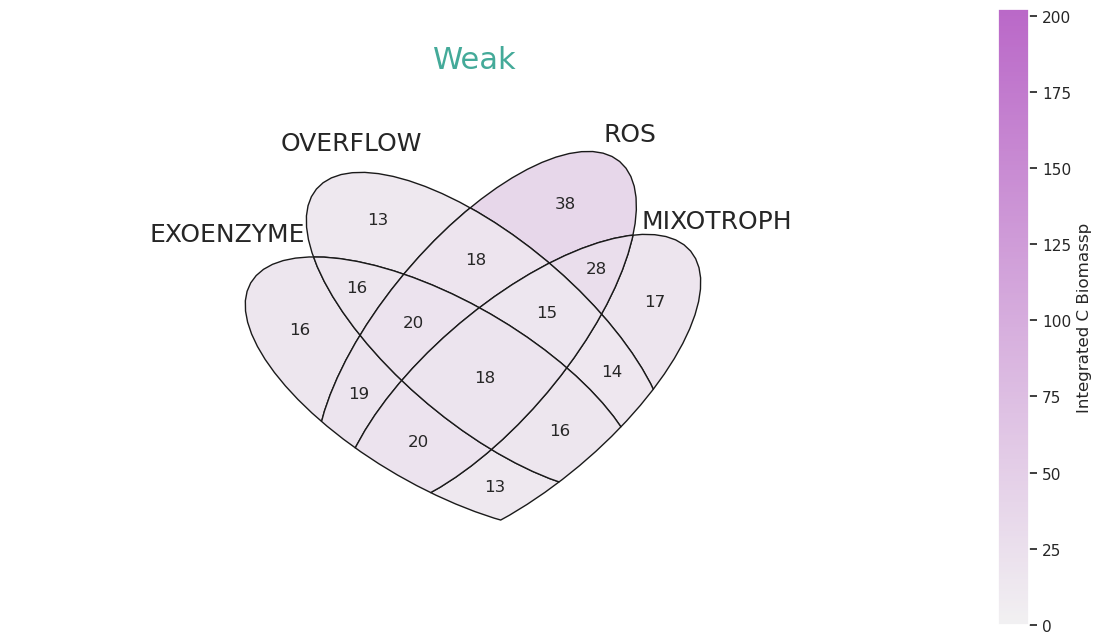

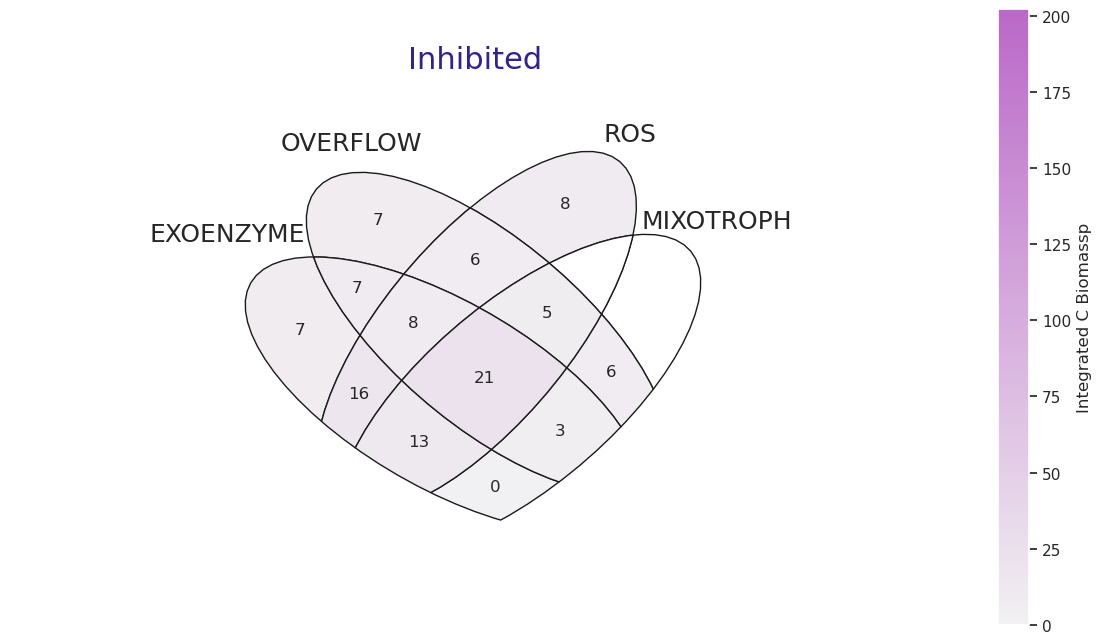

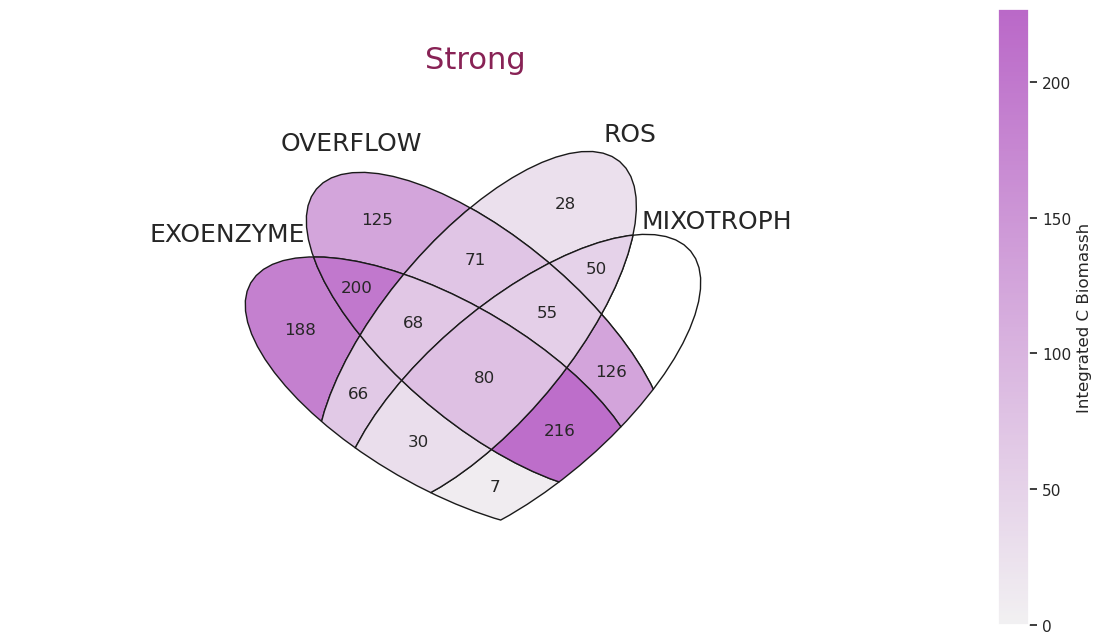

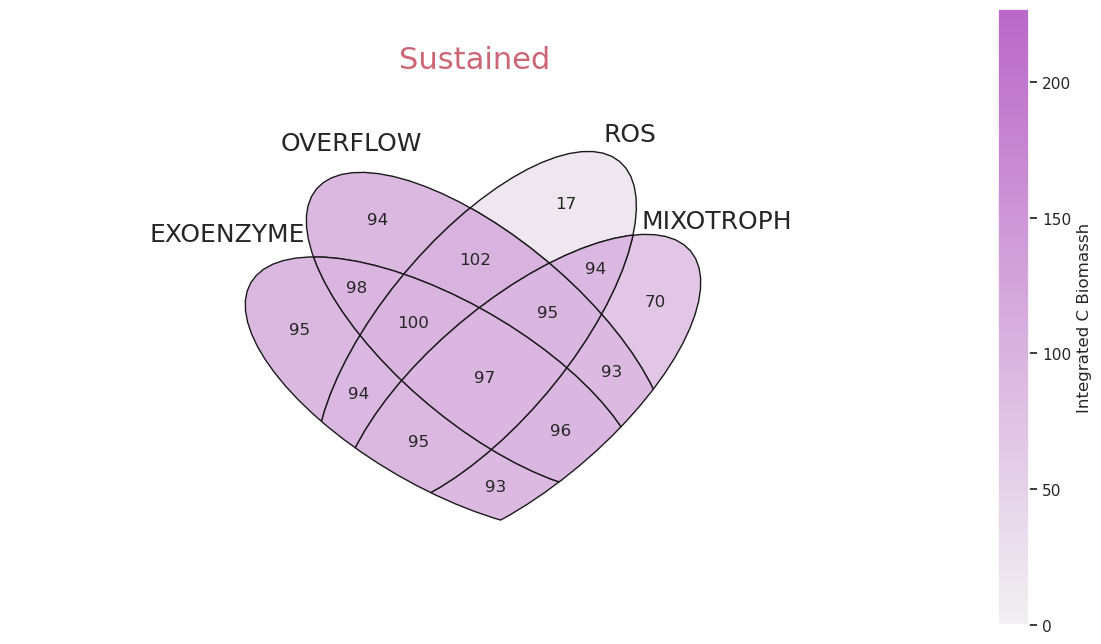

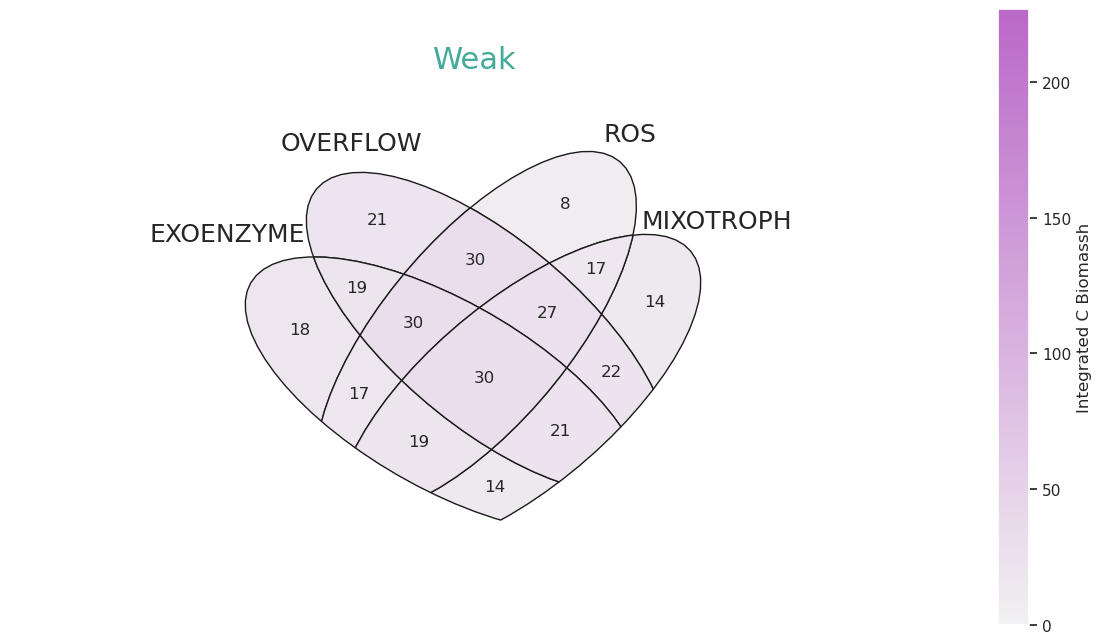

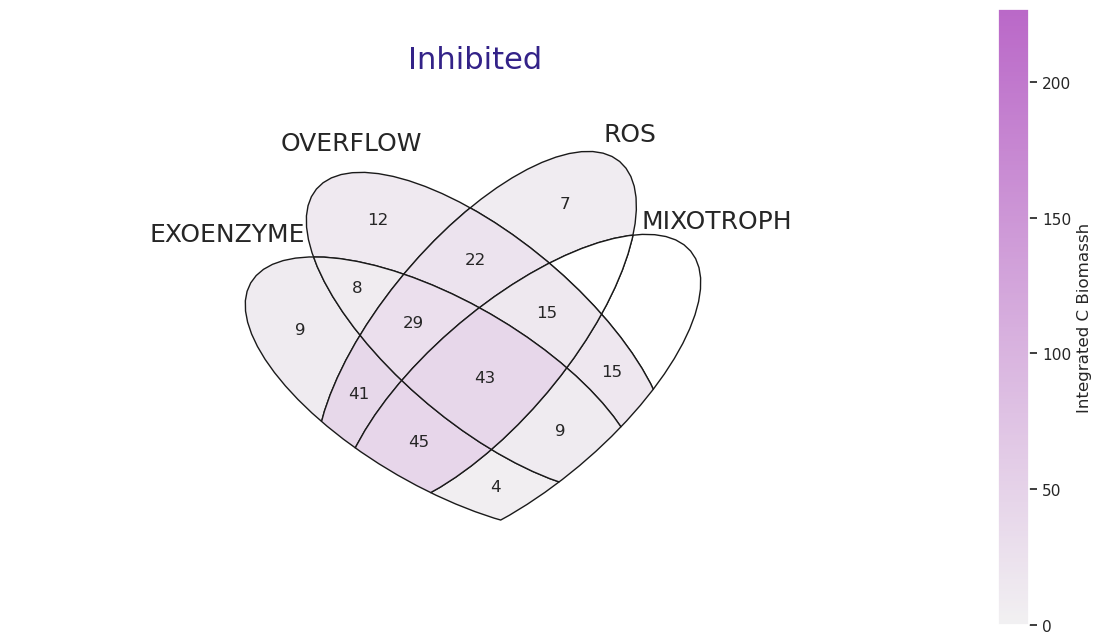

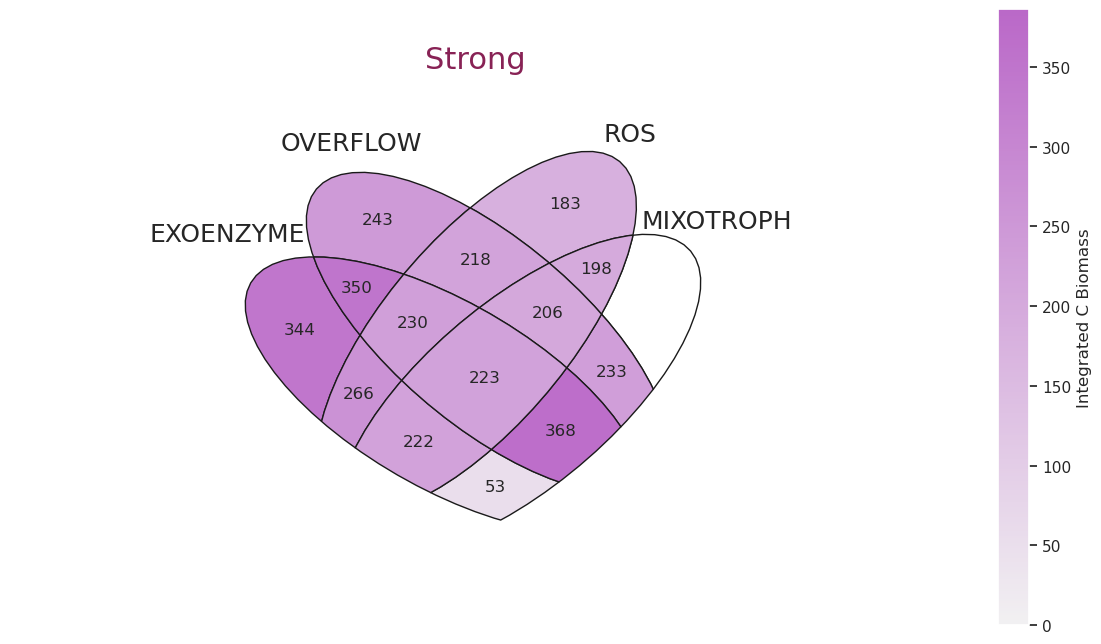

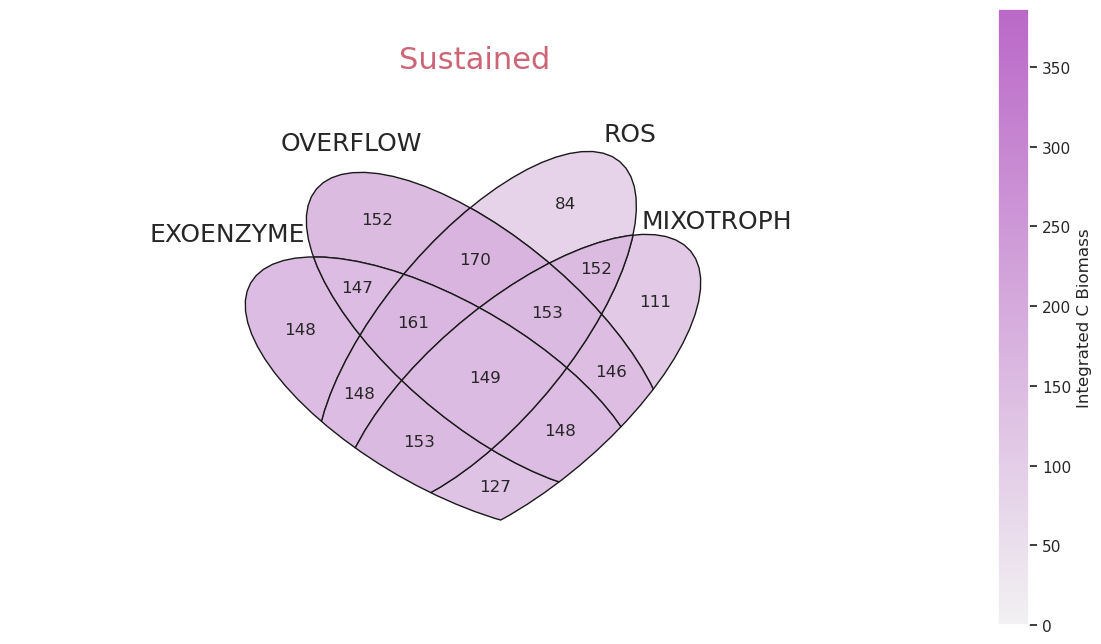

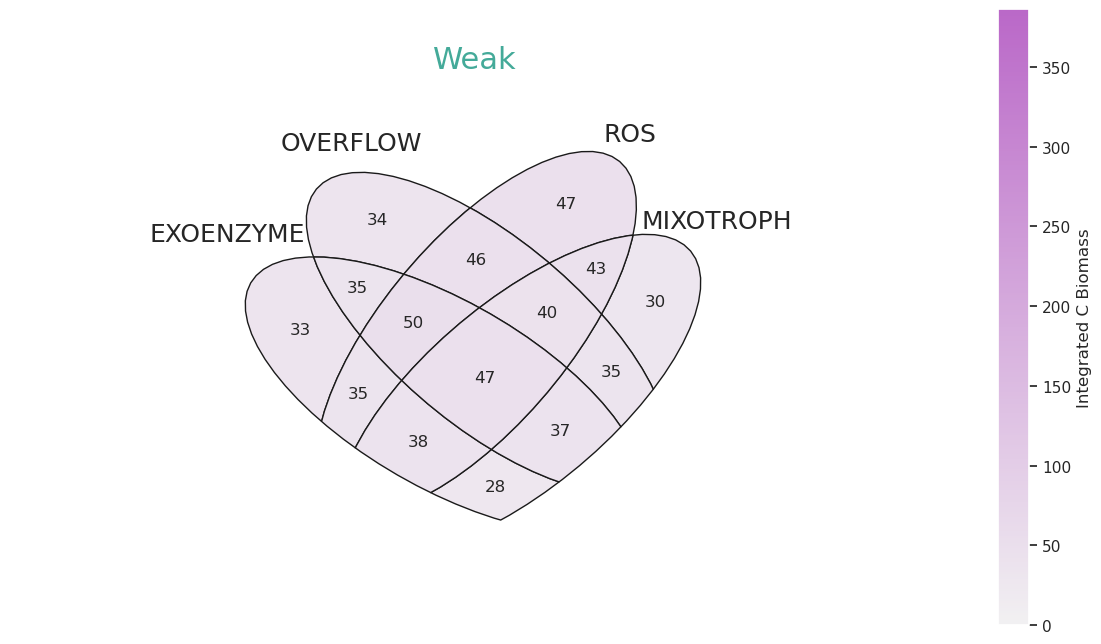

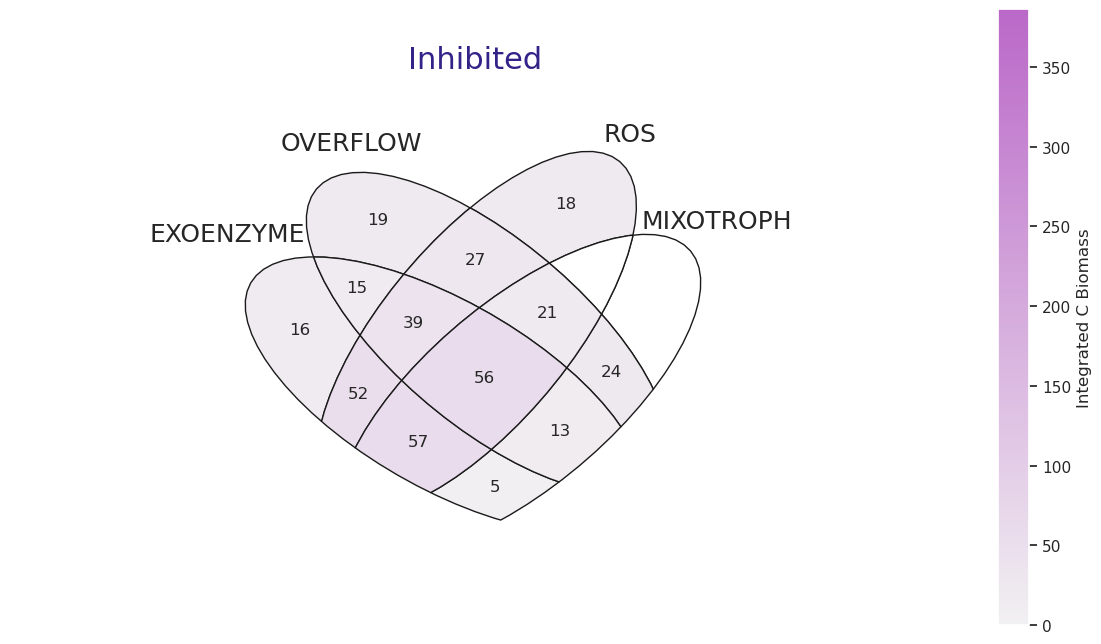

In [115]:
for col in ['Integrated C Biomassp', 'Integrated C Biomassh', 'Integrated C Biomass', ]:
#for col in ['Final Organic C', 'N reuse', ]:
    vmax = comb_df.loc[comb_df.Versatile & comb_df.y_pred.isin(gorder1)].groupby(['y_pred', 'MODEL'])[col].median().max()*1.05 
    for i,c  in zip(gorder1, gpalette1):
        
        data_dict = comb_df.loc[comb_df.Versatile & comb_df.y_pred.isin([i])].groupby(morder)[col].median() 
        multimodel_venn.multimodel_venn(
            morder, cmap=sns.light_palette('#ba68c8', n_colors=16, as_cmap=True), 
            data_dict=data_dict, vmin=0, vmax=vmax, #ec=c,
            cbar_label=col,
            annfmt='.0f'
        )
        plt.title(i, fontsize=22, color=c, va='top')
        plt.show()

In [105]:
gorder1

['Strong', 'Sustained', 'Weak', 'Inhibited']

# BIO GEO chemical

# total PP and total N uptake

# efficiency 
# Total carbon fixation integrated vs final fixed carbon
# New production N vs recycled production


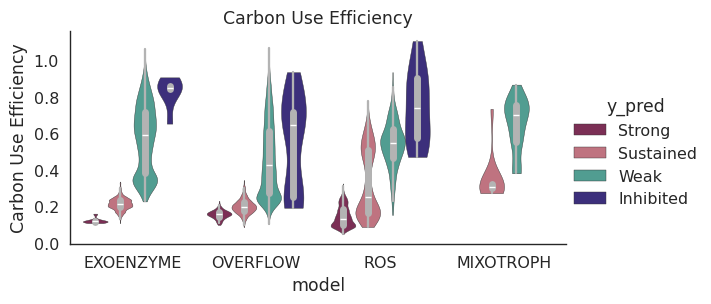

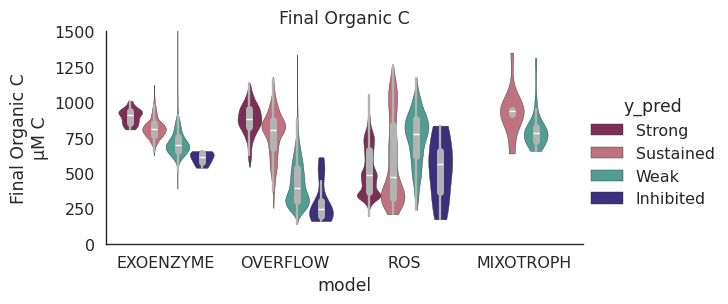

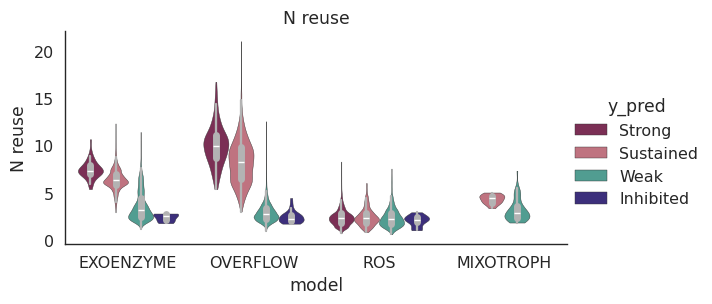

In [132]:
sns.set_context('paper', font_scale=1.3)
for c in ['Carbon Use Efficiency', 'Final Organic C', 'N reuse', ]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

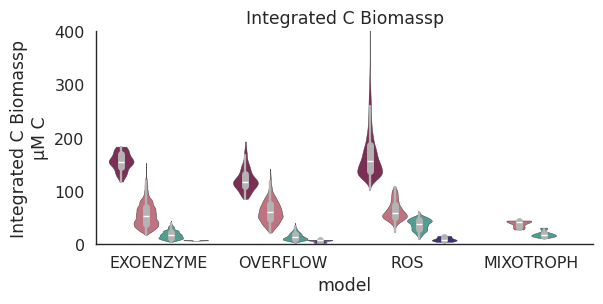

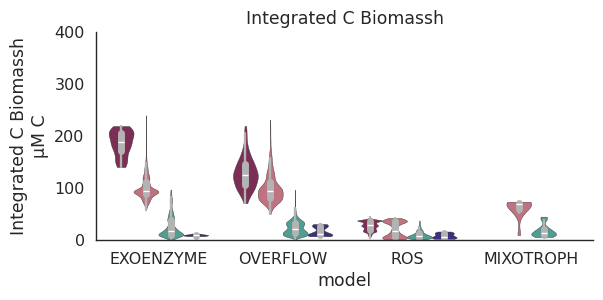

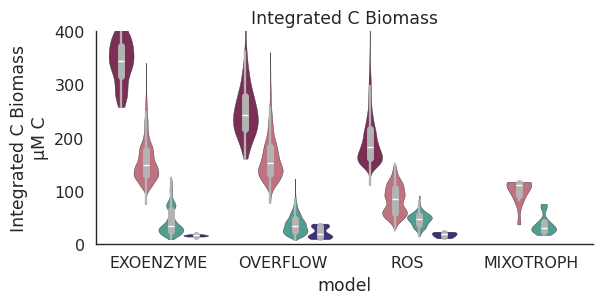

In [143]:
sns.set_context('paper', font_scale=1.3)
for c in ['Integrated C Biomassp', 'Integrated C Biomassh', 'Integrated C Biomass', ]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    #if c == 'Final Organic C':
    g.set(ylim=(0,400), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

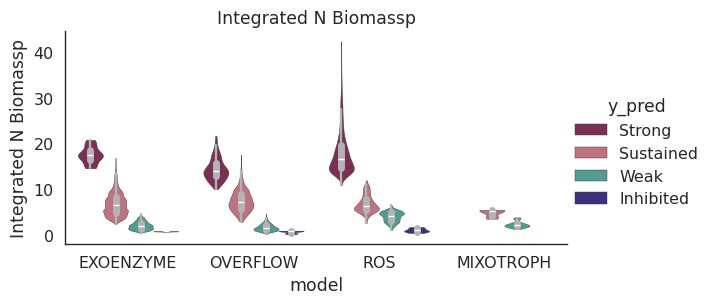

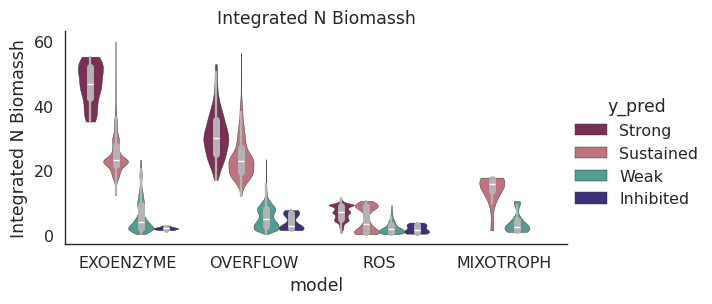

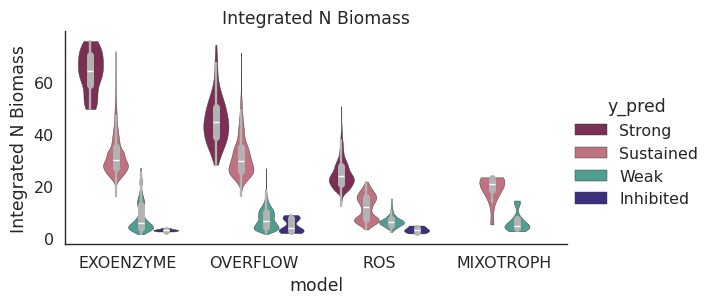

In [141]:
sns.set_context('paper', font_scale=1.3)
for c in ['Integrated N Biomassp', 'Integrated N Biomassh', 'Integrated N Biomass', ]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

In [156]:
comb_df['Final RDOC / Organic C'] = comb_df['Final RDOC'].div(comb_df['Final Organic C'])
comb_df['Final RDON / Total N'] = comb_df['Final RDON'].div(INIT_BH+INIT_BP+INIT_DIN+ INIT_DON)

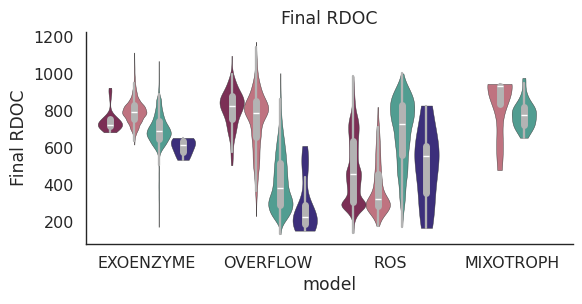

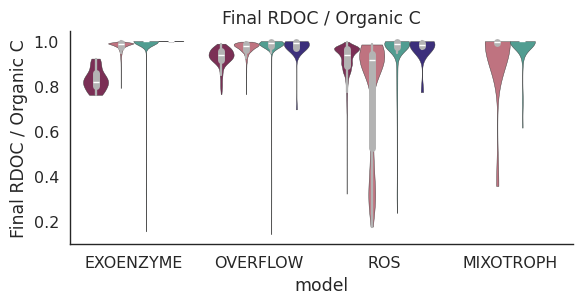

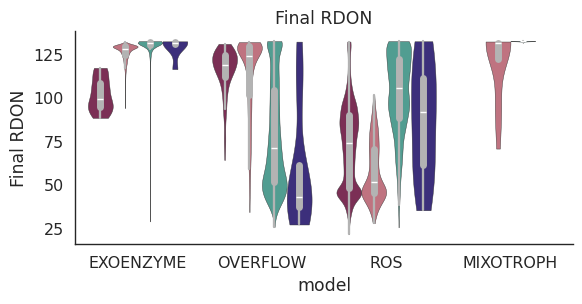

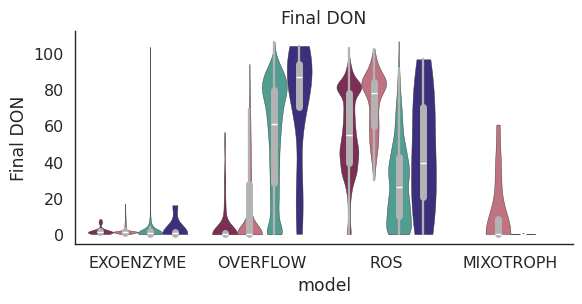

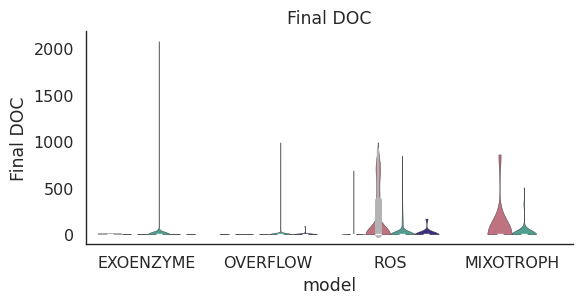

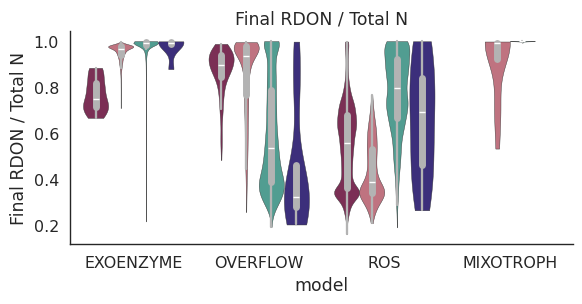

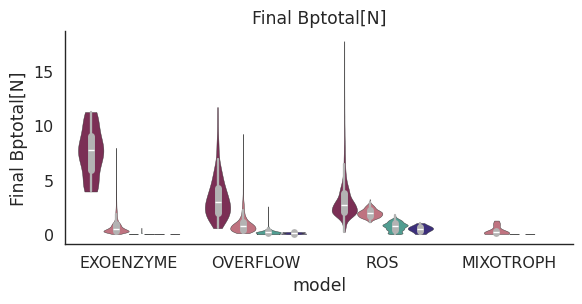

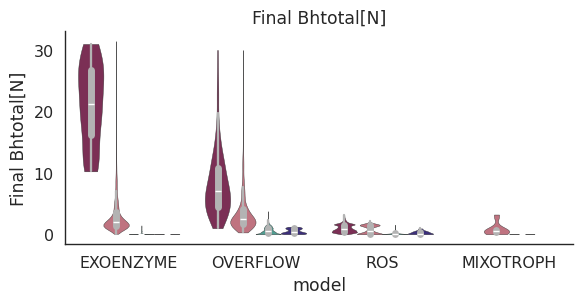

In [162]:
sns.set_context('paper', font_scale=1.3)
for c in ['Final RDOC', 'Final RDOC / Organic C', 'Final RDON', 'Final DON', 'Final DOC', 'Final RDON / Total N',  'Final Bptotal[N]', 'Final Bhtotal[N]',]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

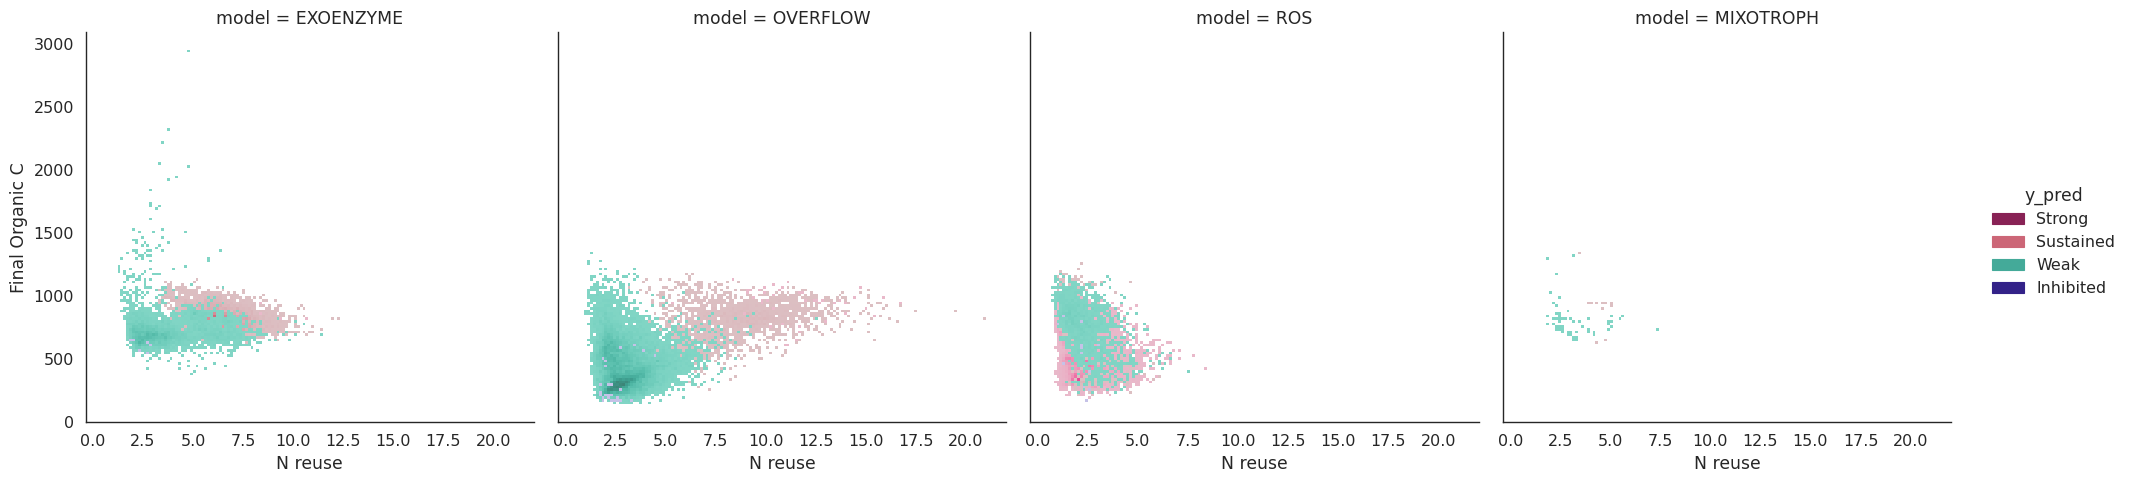

In [136]:
sns.set_context('paper', font_scale=1.3)
g = sns.displot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
     y='Final Organic C', x='N reuse',
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    col='model', col_order=morder,
)


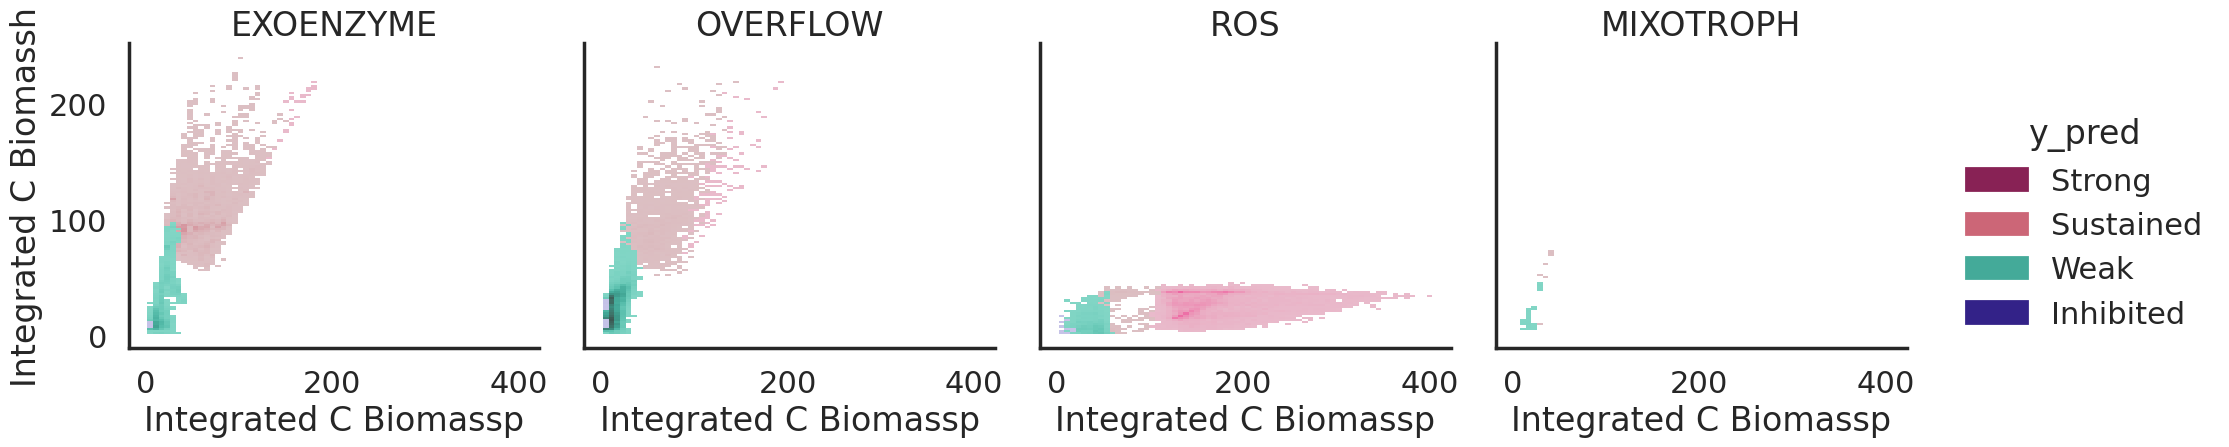

In [146]:
sns.set_context('poster') #, font_scale=1.3)
g = sns.displot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
     y='Integrated C Biomassh', x='Integrated C Biomassp',
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    col='model', col_order=morder,
)
g.set_titles(col_template='{col_name}')